In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load audio files

pluck1, sr = librosa.load('/Users/adamdeedman/Documents/University/Lectures/Third Year/FYP/Python Stage/IDMT-SMT-BASS/PS/FS/BS_1_EQ_1_FS_NO_1_10.wav')
pick1, sr = librosa.load('/Users/adamdeedman/Documents/University/Lectures/Third Year/FYP/Python Stage/IDMT-SMT-BASS/PS/PK/BS_1_EQ_1_PK_NO_1_10.wav')
slap1, sr = librosa.load('/Users/adamdeedman/Documents/University/Lectures/Third Year/FYP/Python Stage/IDMT-SMT-BASS/PS/ST/BS_1_EQ_1_ST_NO_1_10.wav')

In [91]:
# play sound file

ipd.Audio(data=pluck1, rate=sr)

In [92]:
ipd.Audio(data=pick1, rate=sr)

In [93]:
ipd.Audio(data=slap1, rate=sr)

In [3]:
# finds length of each signal array
maxlen = max((len(pluck1)), (len(pick1)), (len(slap1)))

# pads all signals to max length
pluck1_pad = np.pad(pluck1, (0, maxlen - len(pluck1)), 'constant', constant_values=0)
pick1_pad = np.pad(pick1, (0, maxlen - len(pick1)), 'constant', constant_values=0)
slap1_pad = np.pad(slap1, (0, maxlen - len(slap1)), 'constant', constant_values=0)

In [4]:
# duration of one sample

sample_duration = 1/sr

print(f"duration of one sample is: {sample_duration:.6f} seconds")

duration of one sample is: 0.000045 seconds


In [5]:
# duration of whole signal in secs

sig_duration = sample_duration * len(pluck1_pad)
print(f"duration of one sample is: {sig_duration:.6f} seconds")

duration of one sample is: 3.638050 seconds


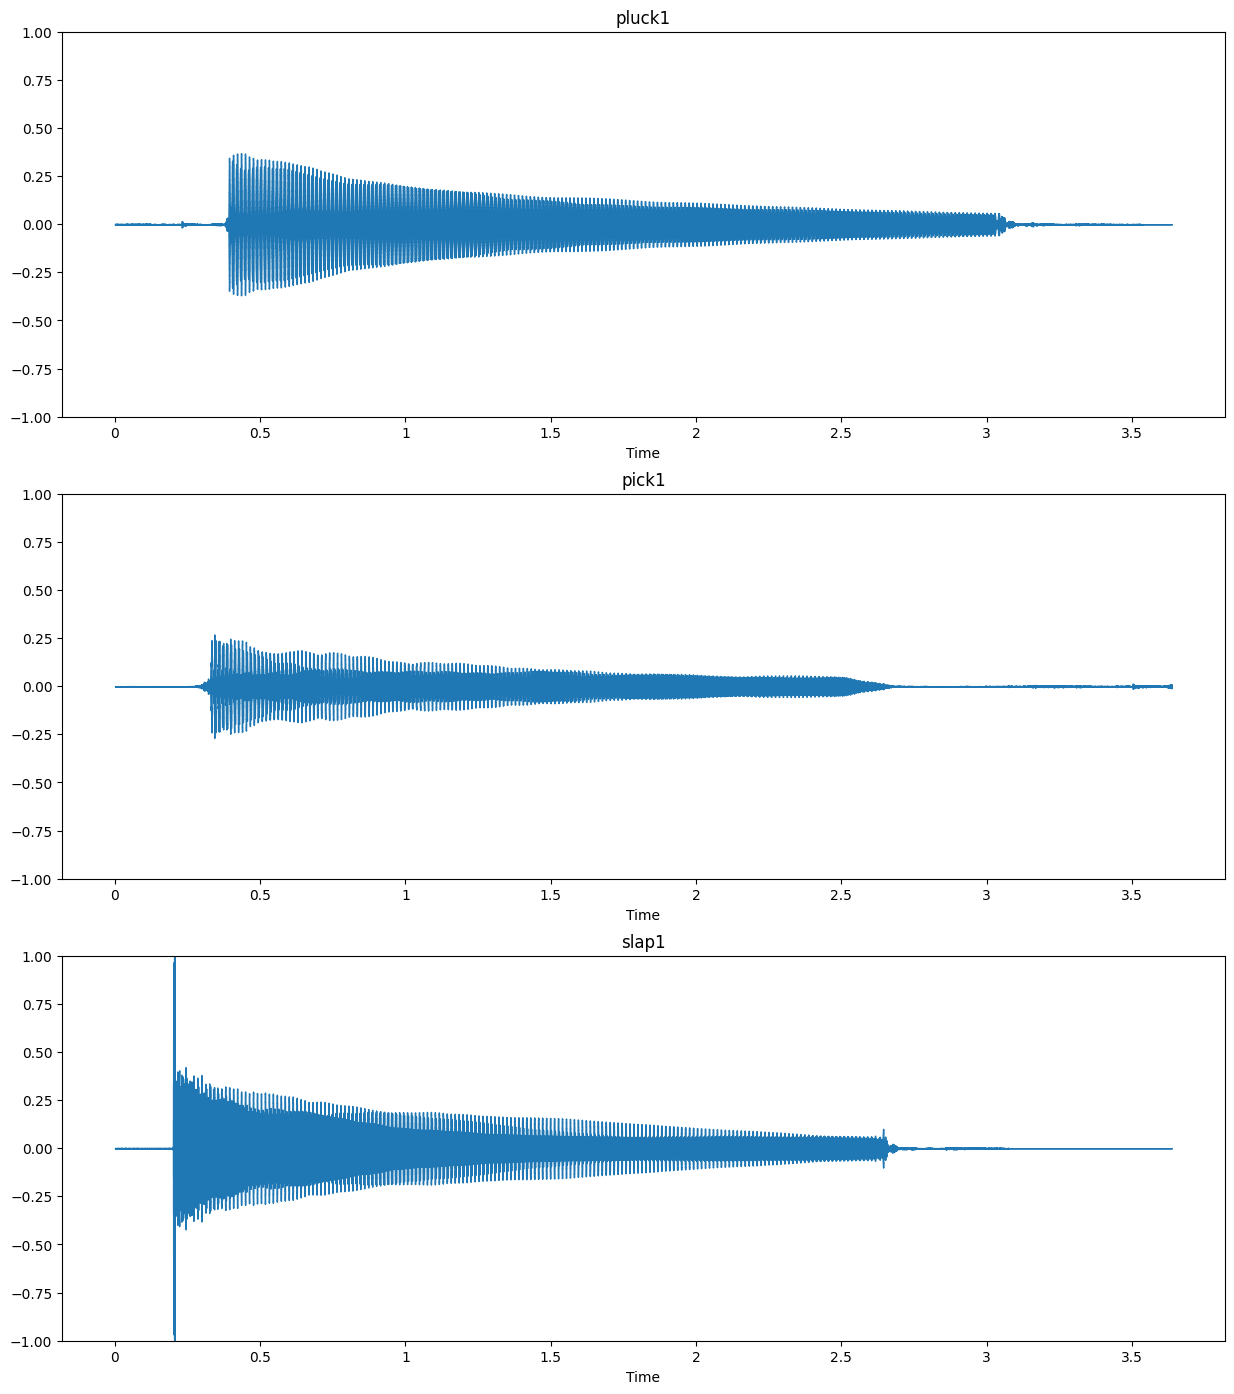

In [97]:
# visualise waveform

plt.figure(figsize=(15,17))

plt.subplot(3, 1, 1)
librosa.display.waveshow(pluck1_pad)
plt.title("pluck1")
plt.ylim((-1,1))

plt.subplot(3, 1, 2)
librosa.display.waveshow(pick1_pad)
plt.title("pick1")
plt.ylim((-1,1))

plt.subplot(3, 1, 3)
librosa.display.waveshow(slap1_pad)
plt.title("slap1")
plt.ylim((-1,1))

plt.show()

In [6]:
# function to calculate amplitude envelope


def amplitude_envelope(signal, frame_size, hop_length):
    amplitude_envelope = []

    # calculate amplitude envelope for each frame

    for i in range(0, len(signal), hop_length):
        current_frame_amplitude_envelope = max(signal[i:i+frame_size])
        amplitude_envelope.append(current_frame_amplitude_envelope)

    return np.array(amplitude_envelope)


# one line version:

def fancy_amplitude_envelope(signal, frame_size, hop_length):
    return np.array([max(signal[i:i+frame_size]) for i in range(0, signal.size, hop_length)])

In [8]:
FS = 1024
HL = 512

In [118]:
ae_pluck1 = amplitude_envelope(pluck1_pad, FS, HL)
ae_pick1 = amplitude_envelope(pick1_pad, FS, HL)
ae_slap1 = amplitude_envelope(slap1_pad, FS, HL)

In [119]:
len(ae_pluck1)

157

In [10]:
fancyae_pluck1 = fancy_amplitude_envelope(pluck1_pad, FS, HL)
len(fancyae_pluck1)

fancyae_pluck1.shape

(157,)

In [127]:
# calculate time of signals

frames = range(0, ae_pluck1.size)
t = librosa.frames_to_time(frames, hop_length=HL)

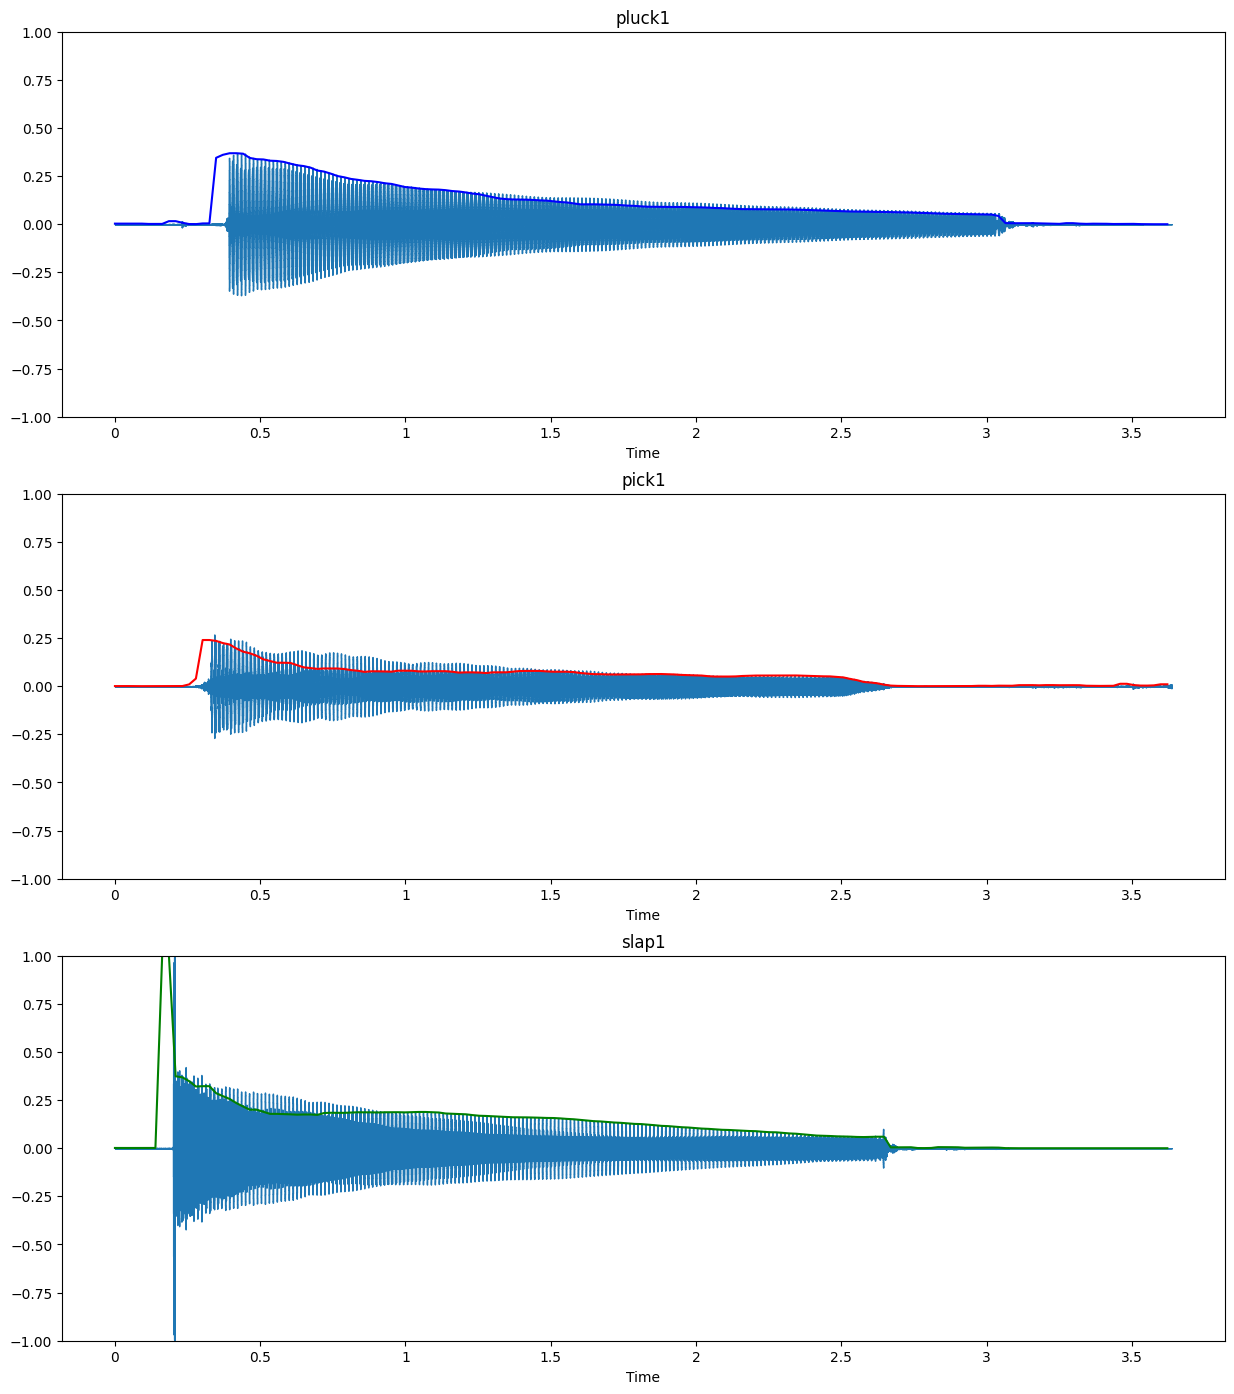

In [128]:
# visualise amplitude envelopes

plt.figure(figsize=(15,17))

plt.subplot(3, 1, 1)
librosa.display.waveshow(pluck1_pad)
plt.plot(t, ae_pluck1, color="b")
plt.title("pluck1")
plt.ylim((-1,1))

plt.subplot(3, 1, 2)
librosa.display.waveshow(pick1_pad)
plt.plot(t, ae_pick1, color="r")
plt.title("pick1")
plt.ylim((-1,1))

plt.subplot(3, 1, 3)
librosa.display.waveshow(slap1_pad)
plt.plot(t, ae_slap1, color="g")
plt.title("slap1")
plt.ylim((-1,1))

plt.show()